# Plots for the paper

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../utils')
from track_fns import *

import numpy as np
from matplotlib import pyplot as plt
from LineageTree import lineageTree
import scipy.stats as stats
import xml.etree.ElementTree as ET
import os
# fix for ete 
os.environ['QT_QPA_PLATFORM']='offscreen'
from ete3 import TreeStyle,NodeStyle
plt.rcParams.update({'font.size': 18})

In [3]:
cd '/home/idjafc/Notebooks/Cells/Tracking'

/home/idjafc/Notebooks/Cells/Tracking


# Load all necessary data

In [4]:
# Load tracks 
print('Exp 33'.center(40,'-'))
dat33_500um,tree33_500um = track_to_coords('./tracks/tracks_1_500um.xml')
dat33_control,tree33_control = track_to_coords('./tracks/tracks_1_control.xml',remove_spurious=False)
#dat33_10um,tree33_10um = track_to_coords('/mnt/dioscuri-nas/Pragyesh/33PD_030323_TMZ_removal/For_tracking/03_10umalltime6.xml')

print('Exp 54'.center(40,'-'))

# 54 C6
dat54_control_high,tree54_control_high = track_to_coords('./tracks/tracks_2_control_high_C6.xml')
dat54_control_low,tree54_control_low = track_to_coords('./tracks/tracks_2_control_low_C6.xml')

#54 F6 
dat54_500um_high,tree54_500um_high = track_to_coords('./tracks/tracks_2_500um_high_F6.xml')
dat54_500um_low,tree54_500um_low = track_to_coords('./tracks/tracks_2_500um_low_F6.xml')

# 54 F5 
dat54_500um_high_F5,tree54_500um_high_F5 = track_to_coords('./tracks/tracks_2_500um_high_F5.xml')
dat54_500um_low_F5,tree54_500um_low_F5 = track_to_coords('./tracks/tracks_2_500um_low_F5.xml')

#54 C5 
dat54_control_high_C5,tree54_control_high_C5 = track_to_coords('./tracks/tracks_2_500um_high_C5.xml')


-----------------Exp 33-----------------
tracks_1_500um.xml
time step: 1799.86767578125 sec pixel size: [0.66917518 0.66917518] um
removed 0 spurious tracks out of  0 suspicious ones 
#tracks: 181, ( 2 <  5 timepoints)
tracks_1_control.xml
time step: 1799.967041015625 sec pixel size: [0.66917518 0.66917518] um
#tracks: 335, ( 20 <  5 timepoints)
-----------------Exp 54-----------------
tracks_2_control_high_C6.xml
time step: 60.0 min pixel size: [1. 1.] um
removed 0 spurious tracks out of  0 suspicious ones 
#tracks: 5, ( 0 <  5 timepoints)
tracks_2_control_low_C6.xml
time step: 60.0 min pixel size: [1. 1.] um
removed 0 spurious tracks out of  0 suspicious ones 
#tracks: 37, ( 2 <  5 timepoints)
tracks_2_500um_high_F6.xml
time step: 60.0 min pixel size: [1. 1.] um
removed 0 spurious tracks out of  0 suspicious ones 
#tracks: 15, ( 1 <  5 timepoints)
tracks_2_500um_low_F6.xml
time step: 60.0 min pixel size: [1. 1.] um
removed 0 spurious tracks out of  0 suspicious ones 
#tracks: 27, ( 0

In [5]:
# fluorescence data
dat_fluo54_control_high = load_from_pickle('fluo/fluo_2_control_high_C6.bin',None)
dat_fluo54_control_low = load_from_pickle('fluo/fluo_2_control_low_C6.bin',None)
dat_fluo54_500um_high = load_from_pickle('fluo/fluo_2_500um_high_F6.bin',None)
dat_fluo54_500um_low = load_from_pickle('fluo/fluo_2_500um_low_F6.bin',None)
dat_fluo54_500um_high_F5 = load_from_pickle('fluo/fluo_2_500um_high_F5.bin',None)
dat_fluo54_500um_low_F5 = load_from_pickle('./fluo/fluo_2_500um_low_F5.bin',None)
dat_fluo54_control_high_C5 = load_from_pickle('./fluo/fluo_2_control_high_C5.bin',None)

Ran out of input
Ran out of input
Ran out of input
Ran out of input
Ran out of input
Ran out of input
Ran out of input


# Fig 1B/1C

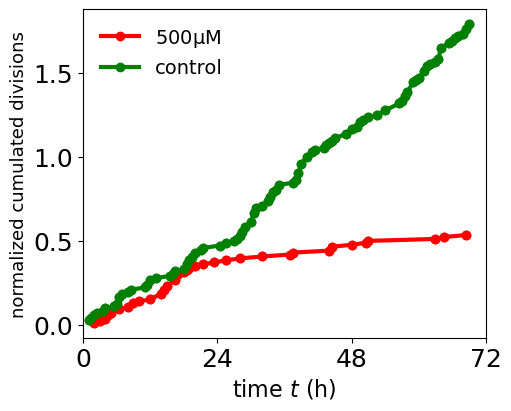

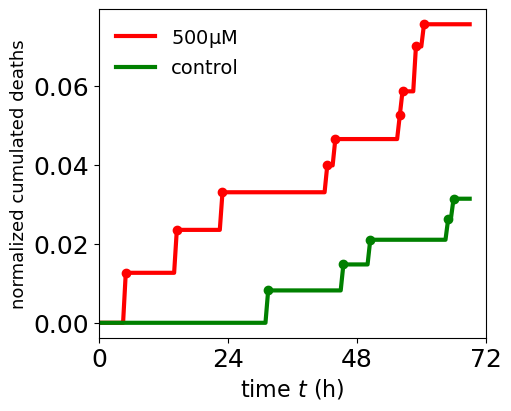

In [6]:
plt.rcParams['text.usetex'] = False
exp_duration = 72
delta_time = 0.5 
exp_label = 'E33'
for i in range(2):
    fig,ax = plt.subplots(1,1,figsize=(5,4),layout='constrained')
    for tree,lab,c in ((tree33_500um,r'500$\mathrm{\mu}$M','red'),(tree33_control,'control','green')):
    
        etree = create_tree_ete3(tree,None,None)
        ticks = range(0,exp_duration+1,24)
        ax.set_xticks(ticks)
        
        if i == 0:
            div_times, _ = get_div_times(etree)
            time, ndiv_time = np.unique(div_times, return_counts=True)
            time = time.astype(int)
            all_times = np.arange(time.max()+1)
            ndiv_all_time = np.zeros_like(all_times)
            ndiv_all_time[time] = ndiv_time
            
            n0 = len(etree.get_children())
            x,y = time*0.5,np.cumsum(ndiv_time)/n0
            #ax[0].plot(x,y,'-o',lw=3,label=lab,color=c)
            
            p = np.polyfit(x,y,deg=1) # assuming N(t) = N0(1+bt), p[1] = b*n0
            yfit = (p[1]+p[0]*x)#

            ax.scatter(x,y,color=c)
            ax.plot(x,y,'-o',lw=3,label=lab,color=c)
            # plot the fit 
            #ax.plot(x,yfit,'--',lw=3,label=lab,color=c)
            #print(''.center(20,'-'))
            #print(p)
                
            ax.set_xlabel('time $t$ (h)',fontsize=16)
            ax.set_ylabel("normalized cumulated divisions",fontsize=13)
            ax.legend(frameon=False,fontsize=14)
            ax.set_xlim(0,exp_duration)
            plt.savefig(f'plots/cumulative_births_{exp_label}.svg')
        
        else:
            death_times,_ = get_death_times(etree)
            time, ndeath_time = np.unique(death_times, return_counts=True)
            time = time.astype(int)
            ndeath_all_time = np.zeros_like(all_times)
            ndeath_all_time[time] = ndeath_time.astype(int)
            tot_pop_all_time = n0+np.cumsum(ndiv_all_time)
            #ax[1].plot(all_times*delta_time,np.cumsum(ndeath_all_time)/tot_pop_all_time,'--',lw=3,label=lab,color=c)
            x,y = (all_times*delta_time) [time], np.cumsum(ndeath_all_time/tot_pop_all_time)[time]

            ax.plot(all_times*delta_time,np.cumsum(ndeath_all_time/tot_pop_all_time),'-',lw=3,label=lab,color=c)
            ax.scatter(x,y,color=c)

            ax.set_xlabel('time $t$ (h)',fontsize=16)
            ax.set_ylabel("normalized cumulated deaths",fontsize=13)#,fontdict={'size':16})
            ax.legend(frameon=False,fontsize=14)
            ax.set_xlim(0,exp_duration)
            ax.set_xticks(ticks)
            plt.savefig(f'plots/cumulative_deaths_{exp_label}.svg')
        
  

# Fig 3B.

/home/idjafc/Notebooks/Cells/Tracking/../utils/track_fns.py:152: RuntimeWarning: Mean of empty slice
  avg_speed = np.nanmean(speed,axis=0)


average speed Exp 33,control: 0.2708478588247386
average speed Exp 33,500um: 0.43563651081926286


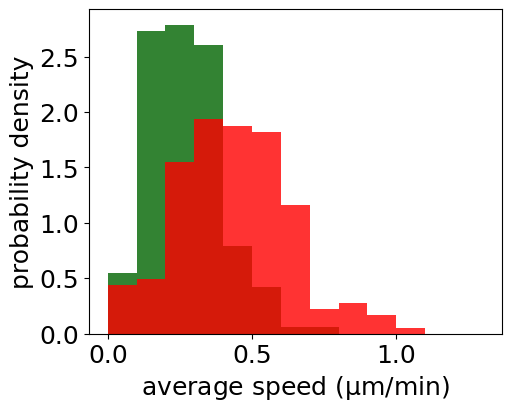

In [7]:
nplots = 1
fig,ax = plt.subplots(1,nplots,figsize=(nplots*5,4),layout='constrained')

for i,(control,treated,exp_label) in enumerate(zip( 
    (dat33_control,),  
    (dat33_500um,),
    ('Exp 33',))):
    for dat,lab,color in zip((control,treated),('control','500um'),('darkgreen','red') ):
        ax.hist(get_avg_speed(dat),color=color,label=lab,density=True,alpha=0.8,bins=np.arange(0,1.4,0.1))
        print(f'average speed {exp_label},{lab}: {np.nanmean(get_avg_speed(dat))}')
    #ax[i].legend()
    #ax[i].set_title(f'replicate {i+1}')
    ax.set_xlabel('average speed ($\mathrm{\mu}$m/min)')
    ax.set_ylabel('probability density')
plt.savefig('plots/distributions_avg_speed.svg')#,bbox_inches='constrained')

## Fig 3C.

1.0 1.0000000000000002


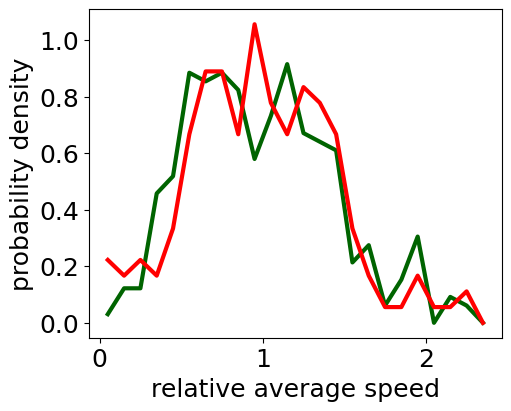

In [8]:
fig,ax = plt.subplots(figsize=(5,4),layout="constrained")
control_dat = [get_avg_speed(z) for z in (dat33_control,)]
tmz_dat = [get_avg_speed(z) for z in (dat33_500um,)]
means = [np.nanmean(np.concatenate((x,y))) for x,y in zip(control_dat,tmz_dat) ]
 
control_dat = [x[x> 0]/np.nanmean(x) for x,y in zip(control_dat,means)]
tmz_dat = [x[x>0]/np.nanmean(x) for x,y in zip(tmz_dat,means)]

print(control_dat[0].mean(),tmz_dat[0].mean())
c,b =np.histogram(np.concatenate(control_dat),bins=np.arange(0,2.5,0.1),density=True,)
ax.plot((b[1:]+b[:-1])*0.5,c,c='darkgreen',lw=3)

c2,b2 =np.histogram(np.concatenate(tmz_dat),bins=np.arange(0,2.5,0.1),density=True,)
ax.plot((b2[1:]+b2[:-1])*0.5,c2,c='red',lw=3)

ax.set_xlabel('relative average speed')
ax.set_ylabel('probability density')
plt.savefig('plots/distributions_avg_speed_cumulated_normed.svg')#,bbox_inches='constrained')

In [9]:
# Ks test 
assert np.all(b == b2) 
from scipy.stats import ks_2samp
ks_2samp(c,c2)

KstestResult(statistic=0.125, pvalue=0.994161229482218, statistic_location=0.15243902439024376, statistic_sign=1)

## Fig 3A.

/home/idjafc/Notebooks/Cells/Tracking/../utils/track_fns.py:176: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(speeds)


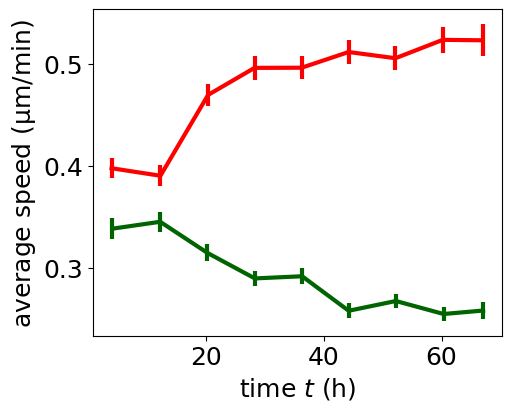

In [10]:

fig, ax = plt.subplots(1,1,figsize=(5,4),layout='constrained',sharey=True)
for i,(dat,lab) in enumerate( (                
                (dat33_500um, 'e33500um'), (dat33_control, 'e33econtrol'),)):
    times = dat[1]
    vels = get_speed(dat)
    tracks_pos = [ [t[:-1]/60,v] for t,v in zip(times,vels)]
    x,y,e = bin_xy_data(tracks_pos,qx=8)

    ax.errorbar(x,y,e,lw=3,label=lab,color='red' if '500um' in lab else 'darkgreen')
    
    ax.set_xlabel('time $t$ (h)')
    ax.set_ylabel('average speed ($\mathrm{\mu}$m/min)')

plt.savefig('plots/avg_speed_vs_time.svg')

# Scatter plots

## Fig 3D. 

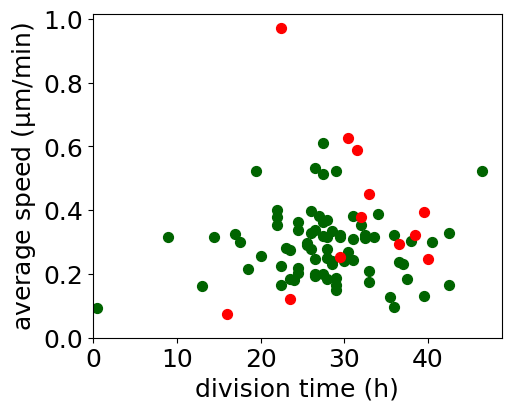

In [11]:
x,y = [],[]
for i,(control,treated,exp_label) in enumerate(zip( (dat33_control,),  (dat33_500um,),('Exp 33',))):
    fig,ax = plt.subplots(figsize=(5,4),layout='constrained')
    for dat,lab,color in zip((control,treated),('control','500um'),('darkgreen','red') ):
        dat = get_nonspurious_tracks(dat)
        av_speeds,(div_times,div_type) = get_avg_speed(dat),get_div_times_lintree(dat)
        assert len(av_speeds) == len(div_times)
        cnd = div_type == 1
        av_speeds = av_speeds[cnd]
        div_times = div_times[cnd]
        
        ax.scatter(div_times/60,av_speeds,s=50,label=lab,color=color)
        x.append(div_times)
        y.append(av_speeds)
    ax.set_xlabel('division time (h)')
    ax.set_ylabel('average speed ($\mathrm{\mu}$m/min)')
    ax.set_xlim(0)
    ax.set_ylim(0)
 
    plt.savefig('plots/division_time_vs_motility_{}.svg'.format(exp_label))

In [12]:
import ndtest 
from scipy.stats import pearsonr
P, D = ndtest.ks2d2s(x[0],y[0],x[1],y[1], extra=True)
print(f"2D pearson: {P=:.3g}, {D=:.3g}")
print(f'pearson control {pearsonr(x[0],y[0])}')
print(f'pearson treated {pearsonr(x[1],y[1])}')

2D pearson: P=0.00813, D=0.524
pearson control PearsonRResult(statistic=0.03551914467765835, pvalue=0.7606609371115778)
pearson treated PearsonRResult(statistic=-0.008961425799024775, pvalue=0.9779488524330325)


## Fig 4A/4B

In [13]:
dat54_500um_pool,fluos_500um_pool =  pool_dat([dat54_500um_high,dat54_500um_high_F5,dat54_500um_low,dat54_500um_low_F5],[dat_fluo54_500um_high,dat_fluo54_500um_high_F5,dat_fluo54_500um_low,dat_fluo54_500um_low_F5] )
dat54_control_pool,fluos_control_pool =  pool_dat([dat54_control_high,dat54_control_high_C5,dat54_control_low ],[dat_fluo54_control_high,dat_fluo54_control_high_C5,dat_fluo54_control_low] )

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/lib/npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


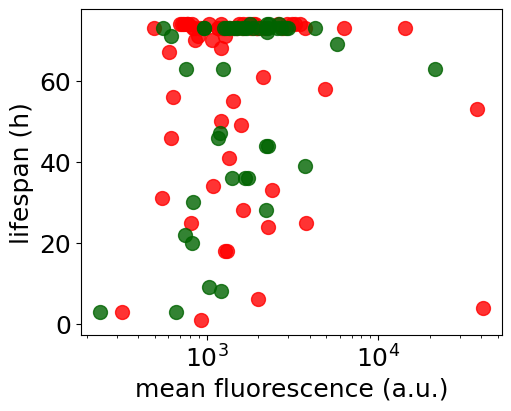

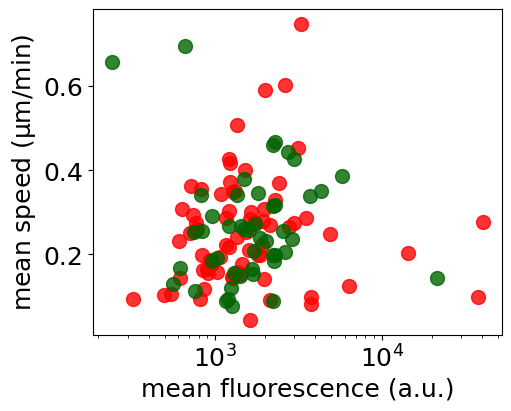

In [14]:
exp_label = None# 'Exp 54'
from functools import partial

for xlab,xfn,xsname,ylab,yfn,ysname in (('mean fluorescence (a.u.)',get_avg_fluo_track,'mean_fluo','lifespan (h)',partial(get_div_times_lintree,remove_spurious=False),'lifespan'),
                                        ('mean fluorescence (a.u.)',get_avg_fluo_track,'mean_fluo','mean speed ($\mathrm{\mu}$m/min)',get_avg_speed,'mean_speed'),
                                       ):

        fig,ax = plt.subplots(1,figsize=(5,4),layout='constrained')
        tosave = []
        for (dat,fluo,lab,color) in ([dat54_500um_pool,fluos_500um_pool,'500um (pooled F5+F6)','red'],
                                  [dat54_control_pool,fluos_control_pool,'control (pooled C5+C6)','darkgreen'],
                                    ):
            fluo_by_node = get_fluo_by_node(fluo)
            xdat = xfn(dat,fluo_by_node)
            ydat = yfn(dat)
            
            if ysname == 'div_time':
                ydat,ytype = ydat
                ydat = ydat[ytype == 1]
                xdat = xdat[ytype==1]
                ydat = ydat/60
                
            elif ysname == 'lifespan':
                ydat,ytype = ydat
                ydat = ydat/60
                        
            ax.scatter(xdat,ydat,label=lab,s=100,alpha=0.8,color=color)
            tosave.append(xdat)
            tosave.append(ydat)
            ax.set_xlabel(xlab)
            ax.set_ylabel(ylab)
            ax.set_xscale('log')
           #ax.set_title(exp_label)
            
        np.save(f'./output_data/scatter_{xsname}_vs_{ysname}.npy',tosave)
        plt.savefig(f'plots/scatter_{xsname}_vs_{ysname}.svg')


In [15]:
### Pearson statistics
from scipy.stats import pearsonr
from glob import glob
import ndtest 
for f in ('./output_data/scatter_mean_fluo_vs_mean_speed.npy',
          './output_data/scatter_mean_fluo_vs_lifespan.npy'):
    x,y,x1,y1 = np.load(f,allow_pickle=True)
    P, D = ndtest.ks2d2s(x,y,x1,y1, extra=True)
    print(f)# {P=:.3g}, {D=:.3g}")
    print(f"2D pearson: {P=:.3g}, {D=:.3g}")
    print(f'pearson control {pearsonr(x,y)}')
    print(f'pearson treated {pearsonr(x1,y1)}')
    #, track_lens

./output_data/scatter_mean_fluo_vs_mean_speed.npy
2D pearson: P=0.288, D=0.205
pearson control PearsonRResult(statistic=-0.0701495175958584, pvalue=0.5610279336808849)
pearson treated PearsonRResult(statistic=-0.07133457907808716, pvalue=0.6337294539371117)
./output_data/scatter_mean_fluo_vs_lifespan.npy
2D pearson: P=0.17, D=0.231
pearson control PearsonRResult(statistic=-0.2247803425115426, pvalue=0.05948269491100562)
pearson treated PearsonRResult(statistic=0.15027368515290276, pvalue=0.31334752617104866)


## Fig 1D.

Divisions are segerated into 3 types:
- `1` is a proper division (between two division)
- `0` is where no division occured
- `-1` if there is a division but the track either started at t=0 or hasn't divided before the end

Exp33 control 	 mean: 27.058595442338426 std: 18.060223818786707
Exp33 500um 	 mean: 44.275750422187926 std: 23.187602704724252


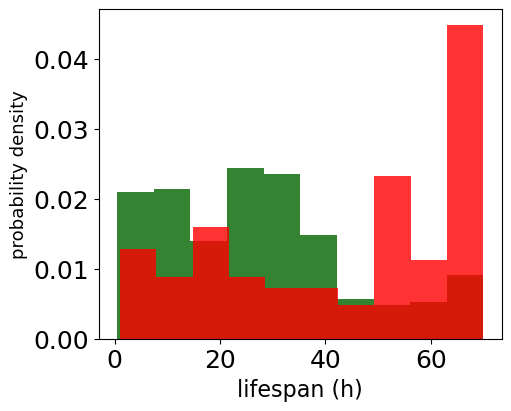

In [16]:


control,treated,tree_control,tree_treated,exp_label = dat33_control,dat33_500um, tree33_control,tree33_500um,'Exp33'

fig,ax = plt.subplots(1,1,figsize=(5,4),layout='constrained',squeeze=False)
for dat,tree,lab,color in zip((control,treated),
                              (tree_control,tree_treated),
                              ('control','500um'),
                              ('darkgreen','red')):
    div_times,div_types = get_div_times_lintree(dat)
    div_times  = div_times/60

    print('{} {} \t mean: {} std: {}'.format(exp_label,lab,div_times.mean(),div_times.std()))
    for j,lab_div_type,cnd in zip(range(2),['all',],[div_types > -2,div_types == 1]):
        ax[j][0].hist(div_times[cnd],label=exp_label+' '+lab,color=color,density=True,alpha=0.8)
        ax[j][0].set_xlabel('lifespan (h)',fontsize=16)
        ax[j][0].set_ylabel('probability density',fontsize=13) 
plt.savefig('plots/histogram_lifespans_{}.svg'.format(exp_label))

# Fig sup 2B.

In [17]:
## all cells are pooled together irrespectively of their fluorescence
dat54_500um_hf,fluos_500um_hf =  pool_dat([dat54_500um_high,dat54_500um_high_F5],[dat_fluo54_500um_high,dat_fluo54_500um_high_F5] )
dat54_500um_lf,fluos_500um_lf =  pool_dat([dat54_500um_low,dat54_500um_low_F5],[dat_fluo54_500um_low,dat_fluo54_500um_low_F5] )
dat54_control_hf,fluos_control_hf =  pool_dat([dat54_control_high,dat54_control_high_C5],[dat_fluo54_control_high,dat_fluo54_control_high_C5] )
dat54_control_lf,fluos_control_lf =  pool_dat([dat54_control_low ,],[dat_fluo54_control_low,] )


dat54_hf,fluos54_hf =  pool_dat([dat54_500um_hf,dat54_control_hf],[fluos_500um_hf,fluos_control_hf] )
dat54_lf,fluos54_lf =  pool_dat([dat54_500um_lf,dat54_control_lf],[fluos_500um_lf,fluos_control_lf] )

dat54_allcontrols,dat_fluo54_allcontrols =  pool_dat([dat54_control_high,dat54_control_low,dat54_control_high_C5,dat54_control_low],
                                                     [dat_fluo54_control_high,dat_fluo54_control_low,dat_fluo54_control_high_C5,dat_fluo54_control_low],
                                                    )


dat54_alltreated,dat_fluo54_alltreated =  pool_dat([dat54_500um_high,dat54_500um_low,dat54_500um_high_F5,dat54_500um_low],
                                                     [dat_fluo54_500um_high,dat_fluo54_500um_low,dat_fluo54_500um_high_F5,dat_fluo54_500um_low],
                                                )

/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/idjafc/.miniconda3/envs/Torch/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


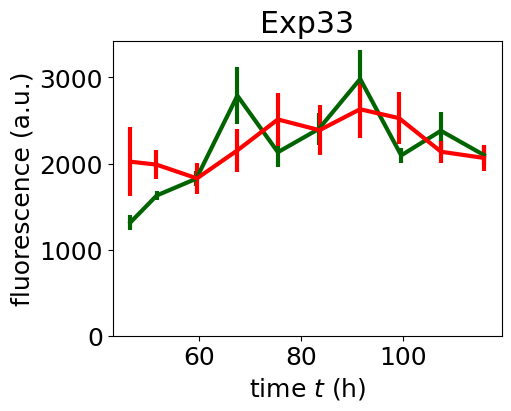

In [18]:

dat_to_compare = {'fluo_timeseries_control_vs_treated':(
                          [dat54_allcontrols,dat_fluo54_allcontrols,'controls','darkgreen'],
                           [dat54_alltreated,dat_fluo54_alltreated,'treated','red']),
                }
for figname,dats in dat_to_compare.items():
    fig,ax = plt.subplots(1,figsize=(5,4),layout='constrained')
    for i,(dat,fluo,lab,color) in enumerate(dats):

        fluo_by_node = get_fluo_by_node(fluo)
        fluo_tracks = get_fluo_track(dat,fluo_by_node)

        times = dat[1]
        times_new = [ np.minimum(e,24*60*5 - 60) for e in times]
        times_bin,fluo_bin,fluo_stderr = bin_xy_data(list(zip(times_new,fluo_tracks)),qx=8*60,dropnan=True)

        to_shift = times_bin == 5 
        ax.errorbar(np.array(times_bin)/60,fluo_bin,fluo_stderr,color=color,lw=3)
        ax.set_ylabel('fluorescence (a.u.)')
        ax.set_xlabel('time $t$ (h)')
        ax.set_ylim(0)
        ax.set_title(exp_label)

    plt.savefig(f'plots/{figname}.svg')